Problem Statement

In this assignment, students will be using the K-nearest neighbors algorithm to predict how many points NBA players scored in the 2013-2014 season.

A look at the data

Before we dive into the algorithm, let’s take a look at our data. Each row in the data contains information on how a player performed in the 2013-2014 NBA season.

Download 'nba_2013.csv' file from this link:
https://www.dropbox.com/s/b3nv38jjo5dxcl6/nba_2013.csv?dl=0

Here are some selected columns from the data:
player - name of the player
pos - the position of the player
g - number of games the player was in
gs - number of games the player started
pts - total points the player scored

There are many more columns in the data, mostly containing information about average player game performance over the course of the season. See this site for an explanation of the rest of them.

We can read our dataset in and figure out which columns are present:

In [1]:
# importing important library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
with open("nba_2013.csv", 'r') as csvfile:
    nba = pd.read_csv(csvfile)

In [2]:
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [3]:
# data info
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
player          481 non-null object
pos             481 non-null object
age             481 non-null int64
bref_team_id    481 non-null object
g               481 non-null int64
gs              481 non-null int64
mp              481 non-null int64
fg              481 non-null int64
fga             481 non-null int64
fg.             479 non-null float64
x3p             481 non-null int64
x3pa            481 non-null int64
x3p.            414 non-null float64
x2p             481 non-null int64
x2pa            481 non-null int64
x2p.            478 non-null float64
efg.            479 non-null float64
ft              481 non-null int64
fta             481 non-null int64
ft.             461 non-null float64
orb             481 non-null int64
drb             481 non-null int64
trb             481 non-null int64
ast             481 non-null int64
stl             481 non-null int64
blk    

In [4]:
# columns name
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [5]:
# checking for null value
nba.isnull().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [6]:
# droping columns having null values
nba.dropna(inplace=True)

In [7]:
# checking for null values
nba.isnull().sum()

player          0
pos             0
age             0
bref_team_id    0
g               0
gs              0
mp              0
fg              0
fga             0
fg.             0
x3p             0
x3pa            0
x3p.            0
x2p             0
x2pa            0
x2p.            0
efg.            0
ft              0
fta             0
ft.             0
orb             0
drb             0
trb             0
ast             0
stl             0
blk             0
tov             0
pf              0
pts             0
season          0
season_end      0
dtype: int64

In [8]:
# checking df shape
nba.shape

(403, 31)

In [9]:
# making a new data frame x

x=nba[['g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
      ]]
x.head()

,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,63,0,847,66,141,0.468,4,15,0.266667,62,...,53,0.660,72,144,216,28,23,26,30,122
3,73,73,2552,464,1011,0.459,128,300,0.426667,336,...,336,0.815,32,230,262,248,35,3,146,136
4,56,30,951,136,249,0.546,0,1,0.000000,136,...,67,0.836,94,183,277,40,23,46,63,187
6,69,69,2498,652,1423,0.458,3,15,0.200000,649,...,360,0.822,166,599,765,178,63,68,123,147
7,65,2,1072,134,300,0.447,2,13,0.153846,132,...,50,0.660,119,192,311,71,24,33,44,126


In [10]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 0 to 480
Data columns (total 24 columns):
g       403 non-null int64
gs      403 non-null int64
mp      403 non-null int64
fg      403 non-null int64
fga     403 non-null int64
fg.     403 non-null float64
x3p     403 non-null int64
x3pa    403 non-null int64
x3p.    403 non-null float64
x2p     403 non-null int64
x2pa    403 non-null int64
x2p.    403 non-null float64
efg.    403 non-null float64
ft      403 non-null int64
fta     403 non-null int64
ft.     403 non-null float64
orb     403 non-null int64
drb     403 non-null int64
trb     403 non-null int64
ast     403 non-null int64
stl     403 non-null int64
blk     403 non-null int64
tov     403 non-null int64
pf      403 non-null int64
dtypes: float64(5), int64(19)
memory usage: 78.7 KB


In [11]:
# making new data frame y
y=nba[['pts']]
y.head()

,pts
0,171
3,1330
4,328
6,1603
7,303


Step 1:- We will train the model without doing any data scaling

In [12]:
# importing the libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# dividing into train-test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25, random_state=42)

# printing the shape of the data frame
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (302, 24)
x_test shape: (101, 24)
y_train shape: (302, 1)
y_test shape: (101, 1)


In [13]:
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

#finding the best k value using cross validation
error=[]
for i in range(1,30,1):
    knn=KNeighborsRegressor(n_neighbors=i);
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='mean_squared_error')
    error.append(scores.mean())
error[:5]

[-10510.917096774194,
 -8892.457715053763,
 -8965.86028673835,
 -8922.141061827957,
 -8543.483415053763]

In [14]:
x_error=[i for i in range(1,30,1)]

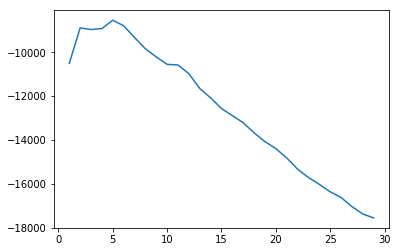

In [15]:
# plotting error vs k value
plt.plot(x_error,error)

In [16]:
# model training and prediction on optimal k value
regressor=KNeighborsRegressor(n_neighbors=6)
regressor.fit(x_train,y_train)
y_predict=regressor.predict(x_test)
error=mean_squared_error(y_test,y_predict)
error

4938.488723872388

Step 2:- We will train the model after doing the normalization

In [17]:
x.head()

,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,63,0,847,66,141,0.468,4,15,0.266667,62,...,53,0.660,72,144,216,28,23,26,30,122
3,73,73,2552,464,1011,0.459,128,300,0.426667,336,...,336,0.815,32,230,262,248,35,3,146,136
4,56,30,951,136,249,0.546,0,1,0.000000,136,...,67,0.836,94,183,277,40,23,46,63,187
6,69,69,2498,652,1423,0.458,3,15,0.200000,649,...,360,0.822,166,599,765,178,63,68,123,147
7,65,2,1072,134,300,0.447,2,13,0.153846,132,...,50,0.660,119,192,311,71,24,33,44,126


In [18]:
# normalizing the data of the data frame
x_norm=(x-x.min())/(x.max()-x.min())
x_norm.head()

,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,0.753086,0.000000,0.269663,0.077739,0.081899,0.710167,0.015326,0.022801,0.266667,0.087819,...,0.064677,0.660,0.163636,0.194858,0.201681,0.038835,0.120419,0.118721,0.101695,0.446886
3,0.876543,0.890244,0.817014,0.546525,0.598220,0.696510,0.490421,0.486971,0.426667,0.475921,...,0.416667,0.815,0.072727,0.311231,0.244631,0.343967,0.183246,0.013699,0.494915,0.498168
4,0.666667,0.365854,0.303050,0.160188,0.145994,0.828528,0.000000,0.000000,0.000000,0.192635,...,0.082090,0.836,0.213636,0.247632,0.258637,0.055479,0.120419,0.210046,0.213559,0.684982
6,0.827160,0.841463,0.799679,0.767962,0.842730,0.694992,0.011494,0.022801,0.200000,0.919263,...,0.446517,0.822,0.377273,0.810555,0.714286,0.246879,0.329843,0.310502,0.416949,0.538462
7,0.777778,0.024390,0.341894,0.157833,0.176261,0.678300,0.007663,0.019544,0.153846,0.186969,...,0.060945,0.660,0.270455,0.259811,0.290383,0.098474,0.125654,0.150685,0.149153,0.461538


In [19]:
# training test split
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,test_size=0.25, random_state=42)

# printing the shape 
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (302, 24)
x_test shape: (101, 24)
y_train shape: (302, 1)
y_test shape: (101, 1)


In [20]:
# filtering the warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

# finding optimal k value using cross validation
error=[]
for i in range(1,30,1):
    knn=KNeighborsRegressor(n_neighbors=i);
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='mean_squared_error')
    error.append(scores.mean())
error[:5]

[-15690.274731182795,
 -13072.992768817205,
 -12194.670896057349,
 -10771.17627016129,
 -11147.162313978493]

In [21]:
x_error=[i for i in range(1,30,1)]

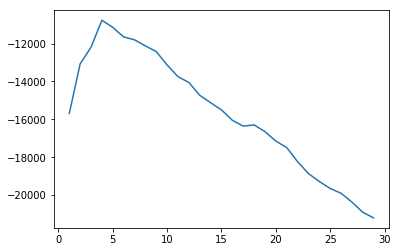

In [22]:
# plotting error vs k value
plt.plot(x_error,error)

In [23]:
# training and predicting model on the optimal k value
regressor=KNeighborsRegressor(n_neighbors=4)
regressor.fit(x_train,y_train)
y_predict=regressor.predict(x_test)
error=mean_squared_error(y_test,y_predict)
error

6814.95853960396

Step 3:- We will train the model after doing the standardization

In [24]:
x.head()

,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,63,0,847,66,141,0.468,4,15,0.266667,62,...,53,0.660,72,144,216,28,23,26,30,122
3,73,73,2552,464,1011,0.459,128,300,0.426667,336,...,336,0.815,32,230,262,248,35,3,146,136
4,56,30,951,136,249,0.546,0,1,0.000000,136,...,67,0.836,94,183,277,40,23,46,63,187
6,69,69,2498,652,1423,0.458,3,15,0.200000,649,...,360,0.822,166,599,765,178,63,68,123,147
7,65,2,1072,134,300,0.447,2,13,0.153846,132,...,50,0.660,119,192,311,71,24,33,44,126


In [25]:
# standardizing value by using below formula a type of scaling
x_stand=(x-x.mean())/x.std()
x_stand.head()

,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,...,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,0.235407,-0.944580,-0.613829,-0.877328,-0.925592,0.482473,-0.826813,-0.859228,-0.115785,-0.723659,...,-0.607244,-0.589593,0.233644,-0.225131,-0.090114,-0.763546,-0.624501,0.044941,-0.803874,0.102809
3,0.676249,1.455748,1.338616,1.426921,1.432458,0.359705,1.545983,1.248019,0.935220,1.106739,...,1.478015,0.519979,-0.412605,0.375022,0.142778,0.864779,-0.279742,-0.705609,1.028200,0.306263
4,-0.073182,0.041856,-0.494735,-0.472058,-0.632869,1.546458,-0.903355,-0.962741,-1.867461,-0.229318,...,-0.504087,0.670309,0.589081,0.047031,0.218722,-0.674728,-0.624501,0.697593,-0.282680,1.047417
6,0.499912,1.324224,1.276779,2.515361,2.549144,0.346064,-0.845948,-0.859228,-0.553704,3.197668,...,1.654856,0.570089,1.752328,2.950097,2.689410,0.346676,0.524695,1.415510,0.664944,0.466120
7,0.323576,-0.878818,-0.356175,-0.483638,-0.494638,0.196015,-0.865084,-0.874015,-0.856879,-0.256039,...,-0.629350,-0.589593,0.992986,0.109838,0.390860,-0.445282,-0.595771,0.273369,-0.582761,0.160939


In [26]:
# dividing the model into train and test
x_train,x_test,y_train,y_test=train_test_split(x_stand,y,test_size=0.25, random_state=42)

#printing the shape
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (302, 24)
x_test shape: (101, 24)
y_train shape: (302, 1)
y_test shape: (101, 1)


In [27]:
# ignoring the warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score

# finding optimal k value by using cross validation
error=[]
for i in range(1,30,1):
    knn=KNeighborsRegressor(n_neighbors=i);
    scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='mean_squared_error')
    error.append(scores.mean())
error[:5]

[-15198.023978494622,
 -12223.87870967742,
 -10368.022234169652,
 -9961.159865591399,
 -9555.96498064516]

In [28]:
x_error=[i for i in range(1,30,1)]

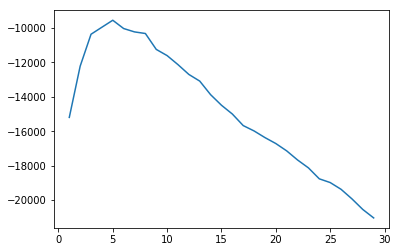

In [29]:
# plotting graph between error vs k value
plt.plot(x_error,error)

In [30]:
# training model and predicting value on the optimal k value
regressor=KNeighborsRegressor(n_neighbors=5)
regressor.fit(x_train,y_train)
y_predict=regressor.predict(x_test)
error=mean_squared_error(y_test,y_predict)
error

9396.441188118812

Conclusion

For data without any scaling Mean squared error =4938.488723872388 , at k=6

For nornalized data Mean squared error =6814.95853960396 , at k=4

For standardized data Mean squared error = 9396.441188118812 , at k=5